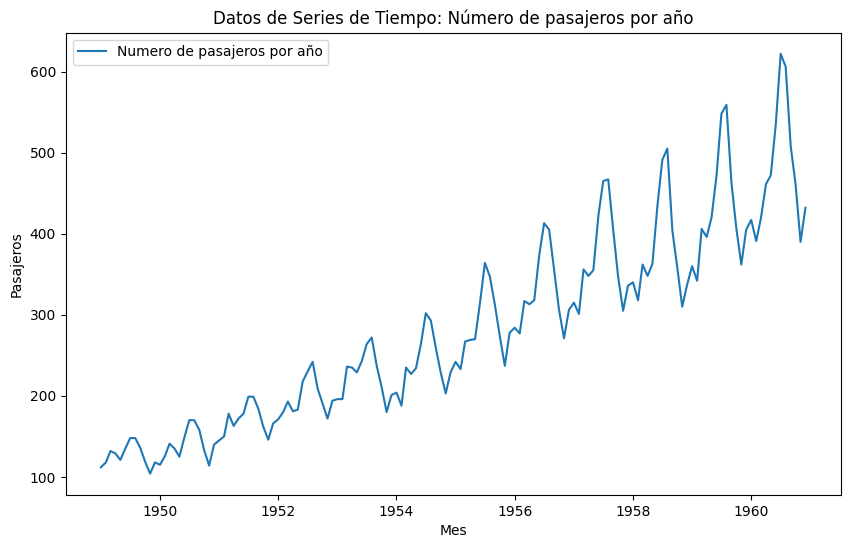

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos de ejemplo
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month')
series = data['#Passengers']

# Plotear los datos
plt.figure(figsize=(10, 6))
plt.plot(series, label='Numero de pasajeros por año')
plt.title('Datos de Series de Tiempo: Número de pasajeros por año')
plt.xlabel('Mes')
plt.ylabel('Pasajeros')
plt.legend()
plt.show()



## Descomposición de los datos

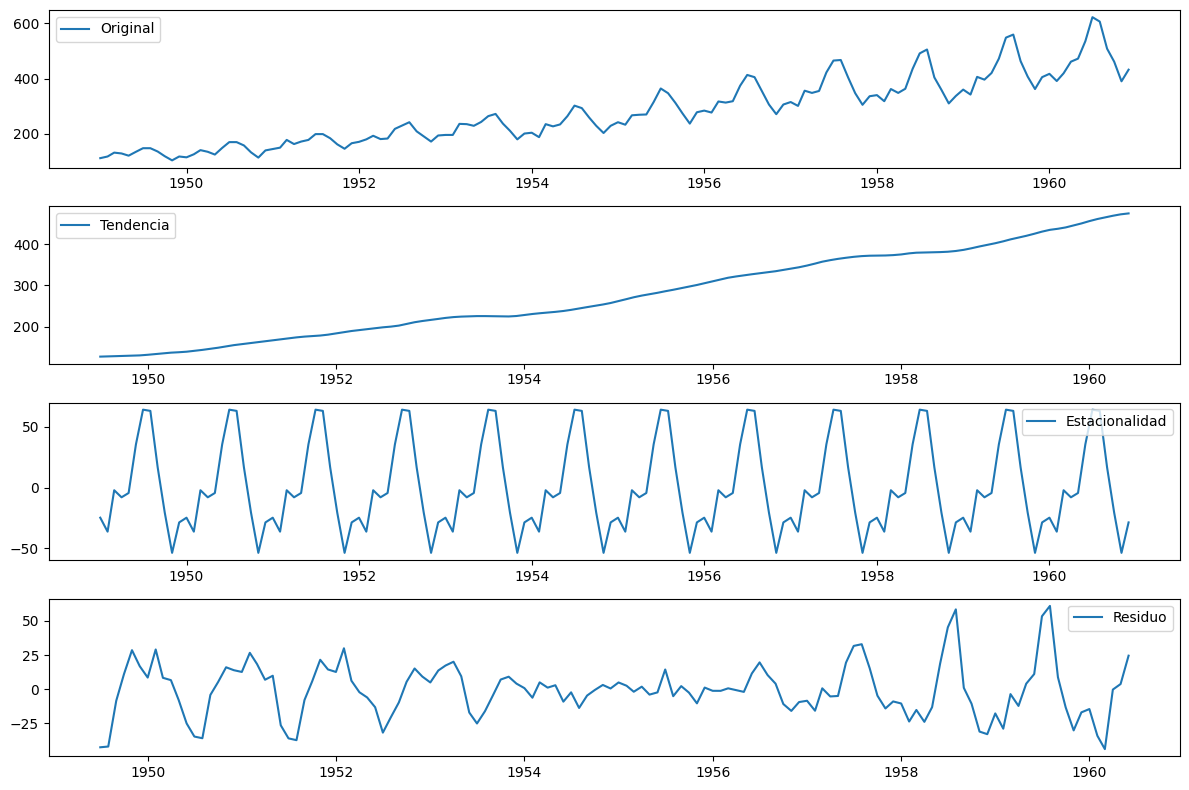

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomponer la serie de tiempo
decomposition = seasonal_decompose(series, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plotear los componentes
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(series, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Tendencia')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Estacionalidad')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuo')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Construir el modelo de Prophet


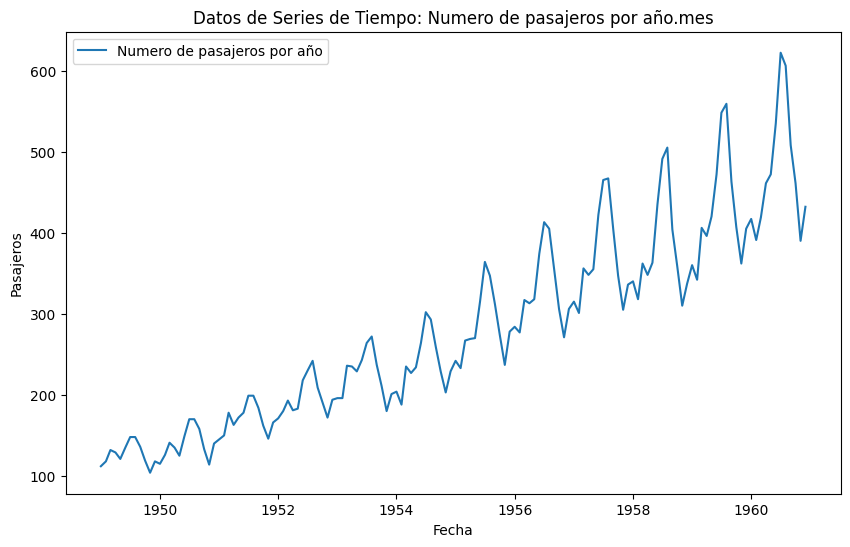

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_yry9qlo/l3wo9gnr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_yry9qlo/h6t721mc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87217', 'data', 'file=/tmp/tmp_yry9qlo/l3wo9gnr.json', 'init=/tmp/tmp_yry9qlo/h6t721mc.json', 'output', 'file=/tmp/tmp_yry9qlo/prophet_model2odncoo1/prophet_model-20240724034821.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:48:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:48:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


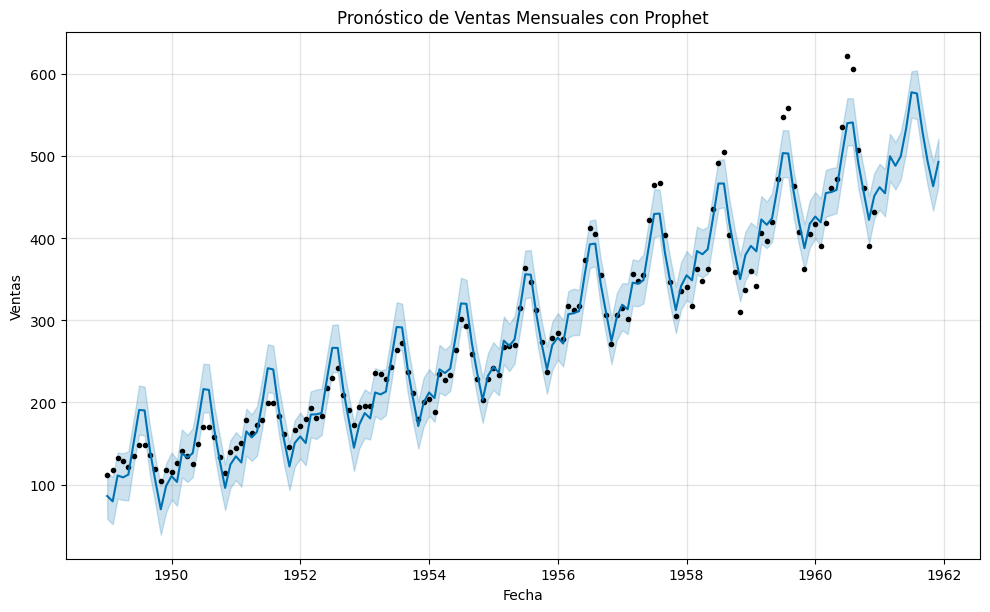

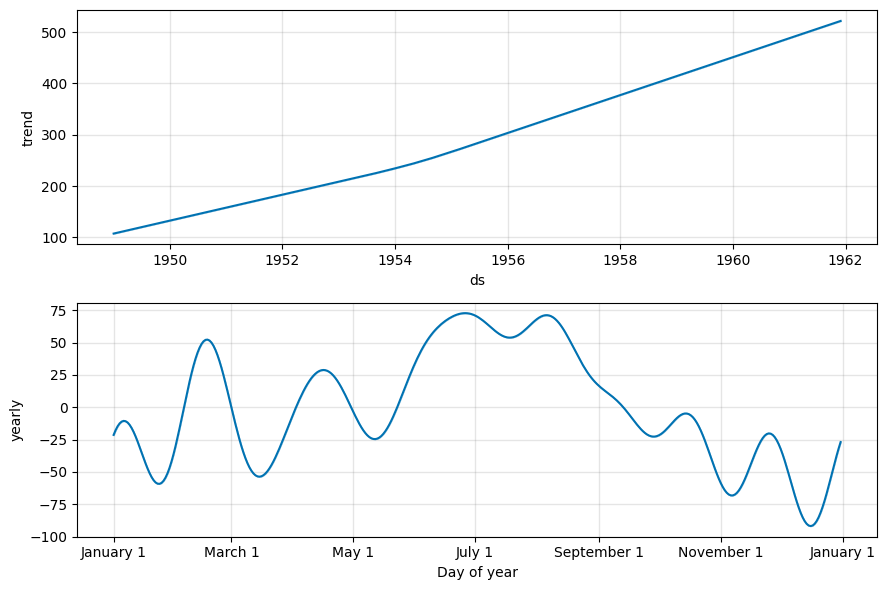

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

# Cargar datos de ejemplo
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month')
data = data.reset_index()
data.columns = ['ds', 'y']

# Visualizar datos
plt.figure(figsize=(10, 6))
plt.plot(data['ds'], data['y'], label='Numero de pasajeros por año')
plt.title('Datos de Series de Tiempo: Numero de pasajeros por año.mes')
plt.xlabel('Fecha')
plt.ylabel('Pasajeros')
plt.legend()
plt.show()

# Construir el modelo Prophet
model = Prophet()
model.fit(data)

# Realizar pronósticos
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Visualizar pronósticos
fig = model.plot(forecast)
plt.title('Pronóstico de Ventas Mensuales con Prophet')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.show()

# Visualizar componentes del modelo
fig2 = model.plot_components(forecast)
plt.show()